In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk

In [2]:
initial_data = pd.read_json('musique_full_v1.0_train.jsonl', lines=True)

In [3]:
initial_data.head()

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",What year did the writer of Crazy Little Thing...,"[{'id': 42543, 'question': 'who wrote crazy li...",1991,[],False
1,2hop__269805_135710,"[{'idx': 0, 'title': 'Milton F. Pavlic', 'para...",What is the country where Nissedal is located ...,"[{'id': 269805, 'question': 'Nissedal >> count...",north,"[North, N]",True
2,2hop__568389_161223,"[{'idx': 0, 'title': 'Bugabula', 'paragraph_te...",What is the highest point in the country where...,"[{'id': 568389, 'question': 'Bugabula >> count...","1,400 metres",[],True
3,2hop__131693_45439,"[{'idx': 0, 'title': 'United States Declaratio...",Who from the state with the Routzahn-Miller Fa...,"[{'id': 131693, 'question': 'Which state is Ro...",Charles Carroll,[],True
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",Who founded the publisher of Journal of Media ...,"[{'id': 150985, 'question': 'What is the name ...",George Routledge,[],False


In [90]:
initial_data[initial_data['answer'] == '']

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable,question_tokens,answer_tokens,question_tokens_lemmatized,answer_tokens_lemmatized
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",year writer crazy little thing called love die,"[{'id': 42543, 'question': 'who wrote crazy li...",,[],False,"[year, writer, crazy, little, thing, called, l...",[],"[year, writer, crazy, little, thing, called, l...",[]
5,2hop__66890_93263,"[{'idx': 0, 'title': 'Red Bull', 'paragraph_te...",athlete became highestpaid went manchester united,"[{'id': 66890, 'question': 'who is the richest...",,[],True,"[athlete, became, highestpaid, went, mancheste...",[],"[athlete, became, highestpaid, went, mancheste...",[]
7,2hop__230157_160837,"[{'idx': 0, 'title': 'Seattle', 'paragraph_tex...",percentage country terekeyurntepui located,"[{'id': 230157, 'question': 'Tereke-yurén-tepu...",,[],False,"[percentage, country, terekeyurntepui, located]",[],"[percentage, country, terekeyurntepui, located]",[]
10,2hop__248482_48850,"[{'idx': 0, 'title': 'Get Your Act Together wi...",sports team employed glyn pardoe get promoted ...,"[{'id': 248482, 'question': 'Glyn Pardoe >> me...",,[],False,"[sports, team, employed, glyn, pardoe, get, pr...",[],"[sport, team, employed, glyn, pardoe, get, pro...",[]
16,2hop__131267_45142,"[{'idx': 0, 'title': 'Lakewood, New York', 'pa...",first walmart open state chautauqua tower located,"[{'id': 131267, 'question': 'Which state is Ch...",,[],True,"[first, walmart, open, state, chautauqua, towe...",[],"[first, walmart, open, state, chautauqua, towe...",[]
...,...,...,...,...,...,...,...,...,...,...,...
39854,3hop1__590101_833580_61459,"[{'idx': 0, 'title': 'Andrea Ghiurghi', 'parag...",italy enter war involved albert country munici...,"[{'id': 590101, 'question': 'Saint-Nicolas >> ...",,[],True,"[italy, enter, war, involved, albert, country,...",[],"[italy, enter, war, involved, albert, country,...",[]
39860,2hop__65323_16350,"[{'idx': 0, 'title': 'USA-126', 'paragraph_tex...",sale inhaled epinephrine ceased country respon...,"[{'id': 65323, 'question': 'where did the glob...",,[],True,"[sale, inhaled, epinephrine, ceased, country, ...",[],"[sale, inhaled, epinephrine, ceased, country, ...",[]
39862,2hop__159801_59031,"[{'idx': 0, 'title': 'Green Revolution in Indi...",industrial revolution start country defeated s...,"[{'id': 159801, 'question': 'Who Spain win aga...",,[],False,"[industrial, revolution, start, country, defea...",[],"[industrial, revolution, start, country, defea...",[]
39869,3hop1__104311_833580_61459,"[{'idx': 0, 'title': 'George McAnthony', 'para...",italy enter conflict albert jef taverniers cou...,"[{'id': 104311, 'question': 'Which country is ...",,[],False,"[italy, enter, conflict, albert, jef, tavernie...",[],"[italy, enter, conflict, albert, jef, tavernie...",[]


In [91]:
initial_data[initial_data['answerable'] == False]

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable,question_tokens,answer_tokens,question_tokens_lemmatized,answer_tokens_lemmatized
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",year writer crazy little thing called love die,"[{'id': 42543, 'question': 'who wrote crazy li...",,[],False,"[year, writer, crazy, little, thing, called, l...",[],"[year, writer, crazy, little, thing, called, l...",[]
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",founded publisher journal media economics,"[{'id': 150985, 'question': 'What is the name ...",george routledge,[],False,"[founded, publisher, journal, media, economics]","[george, routledge]","[founded, publisher, journal, medium, economics]","[george, routledge]"
7,2hop__230157_160837,"[{'idx': 0, 'title': 'Seattle', 'paragraph_tex...",percentage country terekeyurntepui located,"[{'id': 230157, 'question': 'Tereke-yurén-tepu...",,[],False,"[percentage, country, terekeyurntepui, located]",[],"[percentage, country, terekeyurntepui, located]",[]
8,2hop__130463_609442,"[{'idx': 0, 'title': 'Sandy Ridge, Pennsylvani...",range garfield peak state aims community colle...,"[{'id': 130463, 'question': 'What state is Aim...",sawatch range,[],False,"[range, garfield, peak, state, aims, community...","[sawatch, range]","[range, garfield, peak, state, aim, community,...","[sawatch, range]"
9,3hop1__698_669_40159,"[{'idx': 0, 'title': 'Frédéric Chopin', 'parag...",cultures arrival country person paid chopins f...,"[{'id': 698, 'question': 'Who paid for Chopin'...",norman,[],False,"[cultures, arrival, country, person, paid, cho...",[norman],"[culture, arrival, country, person, paid, chop...",[norman]
...,...,...,...,...,...,...,...,...,...,...,...
39868,2hop__60542_12068,"[{'idx': 0, 'title': 'Scotts LawnService', 'pa...",third largest acute care center country contro...,"[{'id': 60542, 'question': 'who controlled flo...",triumph healthcare,[],False,"[third, largest, acute, care, center, country,...","[triumph, healthcare]","[third, largest, acute, care, center, country,...","[triumph, healthcare]"
39869,3hop1__104311_833580_61459,"[{'idx': 0, 'title': 'George McAnthony', 'para...",italy enter conflict albert jef taverniers cou...,"[{'id': 104311, 'question': 'Which country is ...",,[],False,"[italy, enter, conflict, albert, jef, tavernie...",[],"[italy, enter, conflict, albert, jef, tavernie...",[]
39870,3hop1__136817_686928_84236,"[{'idx': 0, 'title': 'If Loving You Is Wrong',...",main importance battle capital state covered c...,"[{'id': 136817, 'question': 'Which place is Th...",boosted continental armys flagging morale insp...,[],False,"[main, importance, battle, capital, state, cov...","[boosted, continental, armys, flagging, morale...","[main, importance, battle, capital, state, cov...","[boosted, continental, army, flagging, morale,..."
39872,3hop1__136013_146352_29562,"[{'idx': 0, 'title': 'Bizet metro station', 'p...",many people make executive branch senate man l...,"[{'id': 136013, 'question': 'Whom is Landau's ...",eight,[],False,"[many, people, make, executive, branch, senate...",[eight],"[many, people, make, executive, branch, senate...",[eight]


In [4]:
df = initial_data.copy()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39876 entries, 0 to 39875
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      39876 non-null  object
 1   paragraphs              39876 non-null  object
 2   question                39876 non-null  object
 3   question_decomposition  39876 non-null  object
 4   answer                  39876 non-null  object
 5   answer_aliases          39876 non-null  object
 6   answerable              39876 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 1.9+ MB
None


### Провести анализ текстов: расчет средней, минимальной и максимальной длины текстов (визуализация распределения)

Для признака question

In [6]:
df['question_len'] = df['question'].apply(lambda x: len(x))

In [7]:
question_len = f"""
Для столбца question:
среднее кол-во символов – {df['question_len'].mean()}
минимальное кол-во символов – {df['question_len'].min()}
максимальное кол-во символов – {df['question_len'].max()}
"""

print(question_len)


Для столбца question:
среднее кол-во символов – 89.9707593539974
минимальное кол-во символов – 29
максимальное кол-во символов – 283



<AxesSubplot:>

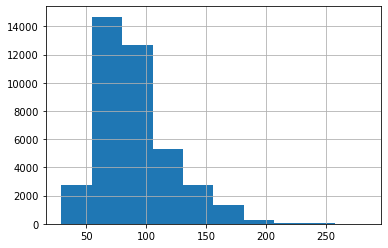

In [8]:
df['question_len'].hist()

Для признака answer

In [9]:
df['answer_len'] = df['answer'].apply(lambda x: len(x))

In [92]:
ans_len = f"""
Для столбца answer:
среднее кол-во символов – {df['answer_len'].mean()}
минимальное кол-во символов – {df['answer_len'].min()}
максимальное кол-во символов – {df['answer_len'].max()}
"""

print(ans_len)


Для столбца answer:
среднее кол-во символов – 14.745360617915539
минимальное кол-во символов – 1
максимальное кол-во символов – 100



<AxesSubplot:>

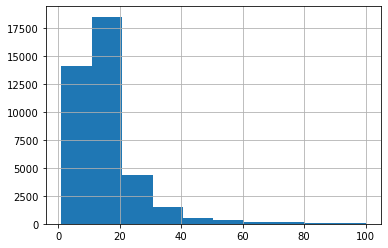

In [93]:
df['answer_len'].hist()

### Провести частотный анализ слов и n-грамм, извлечение биграмм и триграмм

In [12]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

для question

In [13]:
full_multi_hop_questions_text = ' '.join(df['question']).lower().split()

n=1

In [14]:
one_grams_multi_hop_questions = ngrams(full_multi_hop_questions_text, 1)
one_grams_multi_hop_questions_counts = Counter(one_grams_multi_hop_questions)

In [15]:
one_grams_multi_hop_questions_counts_df = pd.DataFrame(one_grams_multi_hop_questions_counts.items(), columns=['One_gram', 'Count']).sort_values(by='Count', ascending=False)

In [16]:
one_grams_multi_hop_questions_counts_df.head()

,One_gram,Count
3,"(the,)",86398
5,"(of,)",34522
12,"(is,)",23606
21,"(in,)",23288
14,"(where,)",16676


n=2

In [17]:
bigrams_multi_hop_questions = ngrams(full_multi_hop_questions_text, 2)
bigrams_multi_hop_questions_counts = Counter(bigrams_multi_hop_questions)

In [18]:
bigram_multi_hop_questions_df = pd.DataFrame(bigrams_multi_hop_questions_counts.items(), columns=['Bigram', 'Count']).sort_values(by='Count', ascending=False)

In [19]:
bigram_multi_hop_questions_df.head(15)

,Bigram,Count
71,"(of, the)",16268
25,"(in, the)",13744
14,"(the, country)",10070
13,"(is, the)",9746
2,"(did, the)",6344
120,"(when, did)",5344
194,"(the, city)",5104
83,"(was, the)",5036
12,"(what, is)",4638
32,"(the, state)",4418


n=3

In [20]:
three_grams_multi_hop_questions = ngrams(full_multi_hop_questions_text, 3)
three_grams_multi_hop_questions_counts = Counter(three_grams_multi_hop_questions)

In [21]:
three_grams_multi_hop_questions_counts_df = pd.DataFrame(three_grams_multi_hop_questions_counts.items(), columns=['Three_Grams', 'Count']).sort_values(by='Count', ascending=False)

In [22]:
three_grams_multi_hop_questions_counts_df.head(15)

,Three_Grams,Count
12,"(what, is, the)",4346
14,"(the, country, where)",4312
129,"(when, did, the)",3914
210,"(the, city, where)",3558
26,"(in, the, country)",3362
98,"(the, state, where)",2810
306,"(who, is, the)",2390
209,"(in, the, city)",2350
97,"(in, the, state)",2334
244,"(of, the, country)",2328


Для answer

In [23]:
full_answers_text = ' '.join(df['answer']).lower().split()

n=1

In [24]:
one_grams_answers = ngrams(full_answers_text, 1)
one_grams_answers_counts = Counter(one_grams_answers)

In [25]:
one_grams_answers_counts_df = pd.DataFrame(one_grams_answers_counts.items(), columns=['One_gram', 'Count']).sort_values(by='Count', ascending=False)

In [26]:
one_grams_answers_counts_df.head()

,One_gram,Count
22,"(the,)",3232
50,"(of,)",2298
45,"(county,)",1828
94,"(in,)",690
104,"(august,)",658


n=2

In [27]:
bigrams_answers = ngrams(full_answers_text, 2)
bigrams_answers_counts = Counter(bigrams_answers)

In [28]:
bigrams_answers_counts_df = pd.DataFrame(bigrams_answers_counts.items(), columns=['Bigram', 'Count']).sort_values(by='Count', ascending=False)

In [29]:
bigrams_answers_counts_df.head()

,Bigram,Count
129,"(of, the)",730
790,"(united, states)",286
359,"(to, the)",210
480,"(in, the)",128
1207,"(international, airport)",126


n=3

In [30]:
three_grams_answers = ngrams(full_answers_text, 3)
three_grams_answers_counts = Counter(three_grams_answers)

In [31]:
three_grams_answers_counts_df = pd.DataFrame(three_grams_answers_counts.items(), columns=['Three_Grams', 'Count']).sort_values(by='Count', ascending=False)

In [32]:
three_grams_answers_counts_df.head(15)

,Three_Grams,Count
581,"(halifax, regional, municipality)",110
339,"(of, the, united)",108
904,"(american, broadcasting, company)",108
456,"(the, 9/11, attacks)",96
214,"(estêvão, da, gama)",92
839,"(the, united, states)",88
1447,"(less, than, a)",82
1450,"(mile, to, the)",82
1451,"(to, the, east)",82
1449,"(a, mile, to)",82


### Подсчёт статистики по символам, распределение частей речи.

In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/george/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

questions – символы

In [34]:
df

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable,question_len,answer_len
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",What year did the writer of Crazy Little Thing...,"[{'id': 42543, 'question': 'who wrote crazy li...",1991,[],False,63,4
1,2hop__269805_135710,"[{'idx': 0, 'title': 'Milton F. Pavlic', 'para...",What is the country where Nissedal is located ...,"[{'id': 269805, 'question': 'Nissedal >> count...",north,"[North, N]",True,58,5
2,2hop__568389_161223,"[{'idx': 0, 'title': 'Bugabula', 'paragraph_te...",What is the highest point in the country where...,"[{'id': 568389, 'question': 'Bugabula >> count...","1,400 metres",[],True,65,12
3,2hop__131693_45439,"[{'idx': 0, 'title': 'United States Declaratio...",Who from the state with the Routzahn-Miller Fa...,"[{'id': 131693, 'question': 'Which state is Ro...",Charles Carroll,[],True,93,15
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",Who founded the publisher of Journal of Media ...,"[{'id': 150985, 'question': 'What is the name ...",George Routledge,[],False,56,16
...,...,...,...,...,...,...,...,...,...
39871,4hop1__104663_221169_833580_61459,"[{'idx': 0, 'title': 'Felix von Heijden', 'par...","When did Italy enter the conflict, involving A...","[{'id': 104663, 'question': 'Which country's c...",1915,[],True,178,4
39872,3hop1__136013_146352_29562,"[{'idx': 0, 'title': 'Bizet metro station', 'p...",How many people make up the executive branch s...,"[{'id': 136013, 'question': 'Whom is Landau's ...",eight,[],False,109,5
39873,2hop__159395_56424,"[{'idx': 0, 'title': 'Camair-Co', 'paragraph_t...",Who was the king of Cameroon's main ally in 1306?,"[{'id': 159395, 'question': 'Who is Cameroon's...",Philip IV,[],True,49,9
39874,3hop1__747740_295863_534758,"[{'idx': 0, 'title': 'Pesanggrahan, South Jaka...",What is the capital of the county next to the ...,"[{'id': 747740, 'question': 'Roaring Brook Tow...",Stroudsburg,"[Stroudsburg, Pennsylvania]",False,88,11


In [49]:
full_multi_hop_questions_text_сount = Counter(list(''.join(df['question'])))

In [50]:
df_full_multi_hop_questions_text_сount = pd.DataFrame(full_multi_hop_questions_text_сount.items(), columns=['Char', 'Count'])
df_full_multi_hop_questions_text_сount = df_full_multi_hop_questions_text_сount.sort_values(by='Count', ascending=False)

In [51]:
df_full_multi_hop_questions_text_сount.head()

,Char,Count
4,,596608
6,e,361850
3,t,284486
11,o,216188
2,a,214150


answers – символы

In [52]:
full_answers_text_сount = Counter(list(''.join(df['answer'])))

In [53]:
df_answers_chars_count = pd.DataFrame(full_answers_text_сount.items(), columns=['Char', 'Count'])
df_answers_chars_count = df_answers_chars_count.sort_values(by='Count', ascending=False)

In [54]:
df_answers_chars_count.head()

,Char,Count
10,,56710
12,e,46858
15,a,41156
2,n,34278
4,r,32024


questions - части речи

In [55]:
    tag_descriptions = {
        'CC': 'Coordinating conjunction (сочинительный союз)',
        'CD': 'Cardinal number (числительное)',
        'DT': 'Determiner (определитель)',
        'EX': 'Existential there (существительное "there")',
        'FW': 'Foreign word (иностранное слово)',
        'IN': 'Preposition or subordinating conjunction (предлог или подчинительный союз)',
        'JJ': 'Adjective (прилагательное)',
        'JJR': 'Adjective, comparative (прилагательное, сравнительная степень)',
        'JJS': 'Adjective, superlative (прилагательное, превосходная степень)',
        'LS': 'List item marker (маркер списка)',
        'MD': 'Modal (модальный глагол)',
        'NN': 'Noun, singular or mass (существительное, единственное число или неисчисляемое)',
        'NNS': 'Noun, plural (существительное, множественное число)',
        'NNP': 'Proper noun, singular (имя собственное, единственное число)',
        'NNPS': 'Proper noun, plural (имя собственное, множественное число)',
        'PDT': 'Predeterminer (предопределитель)',
        'POS': 'Possessive ending (притяжательная форма)',
        'PRP': 'Personal pronoun (личное местоимение)',
        'PRP$': 'Possessive pronoun (притяжательное местоимение)',
        'RB': 'Adverb (наречие)',
        'RBR': 'Adverb, comparative (наречие, сравнительная степень)',
        'RBS': 'Adverb, superlative (наречие, превосходная степень)',
        'RP': 'Particle (частица)',
        'SYM': 'Symbol (символ)',
        'TO': 'to (предлог "to")',
        'UH': 'Interjection (междометие)',
        'VB': 'Verb, base form (глагол, начальная форма)',
        'VBD': 'Verb, past tense (глагол, прошедшее время)',
        'VBG': 'Verb, gerund or present participle (глагол, герундий или настоящее причастие)',
        'VBN': 'Verb, past participle (глагол, прошедшее причастие)',
        'VBP': 'Verb, non-3rd person singular present (глагол, настоящее время, не 3-е лицо)',
        'VBZ': 'Verb, 3rd person singular present (глагол, настоящее время, 3-е лицо)',
        'WDT': 'Wh-determiner (вопросительное местоимение-определитель)',
        'WP': 'Wh-pronoun (вопросительное местоимение)',
        'WP$': 'Possessive wh-pronoun (притяжательное вопросительное местоимение)',
        'WRB': 'Wh-adverb (вопросительное наречие)',
    }

In [56]:
def pos_statistics(text):
    words = nltk.word_tokenize(text)
    pos_counts = Counter(tag for _, tag in nltk.pos_tag(words))
    return dict(pos_counts)

In [57]:
pos_counts_for_questions = pos_statistics(' '.join(full_multi_hop_questions_text))

In [58]:
sorted_pos_counts_for_questions = sorted(pos_counts_for_questions.items(), key=lambda x: x[1], reverse=True)

In [59]:
print("Распределение частей речи для вопросов:")
for tag, count in sorted_pos_counts_for_questions:
        description = tag_descriptions.get(tag, "Unknown tag")
        print(f"{tag}: {count} ({description})")

Распределение частей речи для вопросов:
NN: 182013 (Noun, singular or mass (существительное, единственное число или неисчисляемое))
DT: 95622 (Determiner (определитель))
IN: 87771 (Preposition or subordinating conjunction (предлог или подчинительный союз))
.: 40244 (Unknown tag)
JJ: 38478 (Adjective (прилагательное))
VBD: 36563 (Verb, past tense (глагол, прошедшее время))
VBZ: 32214 (Verb, 3rd person singular present (глагол, настоящее время, 3-е лицо))
WRB: 29004 (Wh-adverb (вопросительное наречие))
WP: 25495 (Wh-pronoun (вопросительное местоимение))
VBN: 25461 (Verb, past participle (глагол, прошедшее причастие))
NNS: 18521 (Noun, plural (существительное, множественное число))
WDT: 10961 (Wh-determiner (вопросительное местоимение-определитель))
VB: 9307 (Verb, base form (глагол, начальная форма))
,: 6378 (Unknown tag)
TO: 6362 (to (предлог "to"))
VBP: 6300 (Verb, non-3rd person singular present (глагол, настоящее время, не 3-е лицо))
POS: 6070 (Possessive ending (притяжательная форма

Анализ частей речи для answers

In [60]:
pos_counts_for_answers = pos_statistics(' '.join(full_answers_text))

In [61]:
sorted_pos_counts_for_answers = sorted(pos_counts_for_answers.items(), key=lambda x: x[1], reverse=True)

In [62]:
print("Распределение частей речи для ответов:")
for tag, count in sorted_pos_counts_for_answers:
        description = tag_descriptions.get(tag, "Unknown tag")
        print(f"{tag}: {count} ({description})")

Распределение частей речи для ответов:
NN: 35605 (Noun, singular or mass (существительное, единственное число или неисчисляемое))
CD: 18202 (Cardinal number (числительное))
JJ: 15460 (Adjective (прилагательное))
NNS: 5391 (Noun, plural (существительное, множественное число))
IN: 5181 (Preposition or subordinating conjunction (предлог или подчинительный союз))
DT: 3972 (Determiner (определитель))
VBP: 2583 (Verb, non-3rd person singular present (глагол, настоящее время, не 3-е лицо))
,: 2356 (Unknown tag)
VBD: 2085 (Verb, past tense (глагол, прошедшее время))
RB: 1696 (Adverb (наречие))
CC: 869 (Coordinating conjunction (сочинительный союз))
VBZ: 840 (Verb, 3rd person singular present (глагол, настоящее время, 3-е лицо))
:: 766 (Unknown tag)
``: 666 (Unknown tag)
VB: 635 (Verb, base form (глагол, начальная форма))
FW: 517 (Foreign word (иностранное слово))
TO: 504 (to (предлог "to"))
POS: 397 (Possessive ending (притяжательная форма))
VBG: 395 (Verb, gerund or present participle (глагол

### Визуализировать данные:
1. распределения классов, меток или числовых признаков;
2. облако наиболее частотных слов и биграмм для выявления ключевых тем (Word Clouds);
3. методы снижения размерности (например, t-SNE) для визуализации текстовых представлений.

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [64]:
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams

пункт 1

<AxesSubplot:>

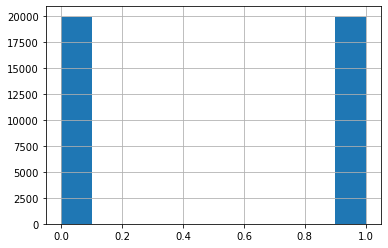

In [65]:
df['answerable'].astype('int').hist()

<AxesSubplot:>

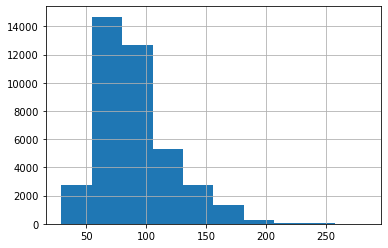

In [66]:
df['question_len'].hist()

<AxesSubplot:>

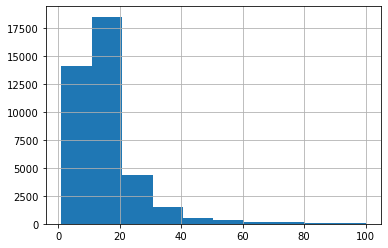

In [67]:
df['answer_len'].hist()

построение облака текста

In [68]:
def generate_wordcloud_from_n_grams_counter(n_grams_counter):
    formatted_counter = {" ".join(gram): count for gram, count in n_grams_counter.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(formatted_counter)    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Облако слов questions

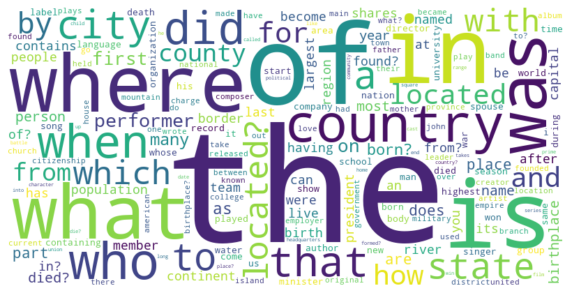

In [69]:
generate_wordcloud_from_n_grams_counter(one_grams_multi_hop_questions_counts)

Облако биграм questions

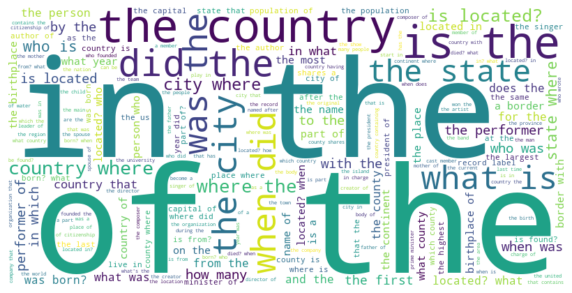

In [70]:
generate_wordcloud_from_n_grams_counter(bigrams_multi_hop_questions_counts)

Облако биграм answers

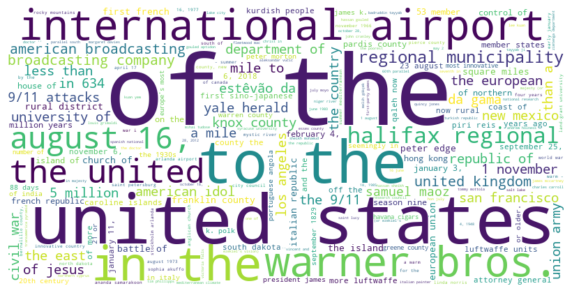

In [71]:
generate_wordcloud_from_n_grams_counter(bigrams_answers_counts)

Облако слов answers

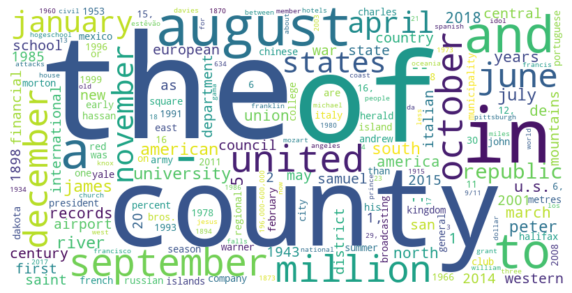

In [72]:
generate_wordcloud_from_n_grams_counter(one_grams_answers_counts)

### Провести первичную предобработку текста

○ оценить и обработать пропуски, дубликаты; очистить текст от шумовых данных: ненужных символов, HTML-тегов,
специальных символов;

In [73]:
print(f"Количество пропусков по столбцам: {initial_data.isna().sum()}")

Количество пропусков по столбцам: id                        0
paragraphs                0
question                  0
question_decomposition    0
answer                    0
answer_aliases            0
answerable                0
dtype: int64


In [74]:
initial_data[initial_data.applymap(lambda x: str(x) if isinstance(x, list) else x).duplicated() == True]

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable


In [75]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

initial_data['question'] = initial_data['question'].apply(clean_text)
initial_data['answer'] = initial_data['answer'].apply(clean_text)

In [76]:
initial_data.head()

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",What year did the writer of Crazy Little Thing...,"[{'id': 42543, 'question': 'who wrote crazy li...",,[],False
1,2hop__269805_135710,"[{'idx': 0, 'title': 'Milton F. Pavlic', 'para...",What is the country where Nissedal is located ...,"[{'id': 269805, 'question': 'Nissedal >> count...",north,"[North, N]",True
2,2hop__568389_161223,"[{'idx': 0, 'title': 'Bugabula', 'paragraph_te...",What is the highest point in the country where...,"[{'id': 568389, 'question': 'Bugabula >> count...",metres,[],True
3,2hop__131693_45439,"[{'idx': 0, 'title': 'United States Declaratio...",Who from the state with the RoutzahnMiller Far...,"[{'id': 131693, 'question': 'Which state is Ro...",Charles Carroll,[],True
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",Who founded the publisher of Journal of Media ...,"[{'id': 150985, 'question': 'What is the name ...",George Routledge,[],False


○ преобразовать регистр, исключить стоп-слова

In [77]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
def remove_stopwords(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [79]:
initial_data['question'] = initial_data['question'].apply(remove_stopwords)
initial_data['answer'] = initial_data['answer'].apply(remove_stopwords)

провести токенизацию (разбить на слова, предложения, символы)

In [80]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

initial_data['question_tokens'] = initial_data['question'].apply(word_tokenize)
initial_data['answer_tokens'] = initial_data['answer'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /Users/george/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


провести лемматизацию

In [81]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /Users/george/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/george/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

initial_data['question_tokens_lemmatized'] = initial_data['question_tokens'].apply(lemmatize_text)
initial_data['answer_tokens_lemmatized'] = initial_data['answer_tokens'].apply(lemmatize_text)

In [83]:
initial_data.head()

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable,question_tokens,answer_tokens,question_tokens_lemmatized,answer_tokens_lemmatized
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",year writer crazy little thing called love die,"[{'id': 42543, 'question': 'who wrote crazy li...",,[],False,"[year, writer, crazy, little, thing, called, l...",[],"[year, writer, crazy, little, thing, called, l...",[]
1,2hop__269805_135710,"[{'idx': 0, 'title': 'Milton F. Pavlic', 'para...",country nissedal located named,"[{'id': 269805, 'question': 'Nissedal >> count...",north,"[North, N]",True,"[country, nissedal, located, named]",[north],"[country, nissedal, located, named]",[north]
2,2hop__568389_161223,"[{'idx': 0, 'title': 'Bugabula', 'paragraph_te...",highest point country bugabula found,"[{'id': 568389, 'question': 'Bugabula >> count...",metres,[],True,"[highest, point, country, bugabula, found]",[metres],"[highest, point, country, bugabula, found]",[metre]
3,2hop__131693_45439,"[{'idx': 0, 'title': 'United States Declaratio...",state routzahnmiller farmstead signed declarat...,"[{'id': 131693, 'question': 'Which state is Ro...",charles carroll,[],True,"[state, routzahnmiller, farmstead, signed, dec...","[charles, carroll]","[state, routzahnmiller, farmstead, signed, dec...","[charles, carroll]"
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",founded publisher journal media economics,"[{'id': 150985, 'question': 'What is the name ...",george routledge,[],False,"[founded, publisher, journal, media, economics]","[george, routledge]","[founded, publisher, journal, medium, economics]","[george, routledge]"
